In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import random
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.stats.anova import AnovaRM
#from sklearn.metrics import r2_score
#from sklearn.model_selection import train_test_split
import math
from scipy.stats import norm
from scipy.stats import t
from scipy.stats import f
from scipy.stats import chi2
import statistics

In [ ]:
social = pd.read_csv('Social_Media_Usage_Study_1.csv')
n = 47
age = social['Your_Age_Group']

FileNotFoundError: ignored

In [ ]:
age1 = []
age2 = []
age3 = []
age4 = []

for i in range(len(social)):
    if age[i] < 23:
        age1.append(age[i])
    elif age[i] >= 23 and age[i] < 28:
        age2.append(age[i])
    elif age[i] >= 28 and age[i] < 33:
        age3.append(age[i])
    elif age[i] >= 33:
        age4.append(age[i])

ageCounts = [len(age1), len(age2), len(age3), len(age4)]

Labels = ['18-22', '23-27', '28-32', '33 and Up']

plt.pie(ageCounts, labels=Labels, autopct='%1.1f%%')
plt.show()

In [ ]:
total = social['Total']
print('Average Social Media usage:')
total.mean()

Average Social Media usage:


8.829787234042554

In [ ]:
age1total = []
age2total = []
age3total = []
age4total = []

In [ ]:
for i in range(len(social)):
    if age[i] < 23:
        age1total.append(total[i])
    elif age[i] >= 23 and age[i] < 28:
        age2total.append(total[i])
    elif age[i] >= 28 and age[i] < 33:
        age3total.append(total[i])
    elif age[i] >= 33:
        age4total.append(total[i])

In [ ]:
age1average = sum(age1total)/len(age1total)
age2average = sum(age2total)/len(age2total)
age3average = sum(age3total)/len(age3total)
age4average = sum(age4total)/len(age4total)

print('The average social media usage for 18-22 is: ' + str(age1average))
print('The average social media usage for 23-27 is: ' + str(age2average))
print('The average social media usage for 28-32 is: ' + str(age3average))
print('The average social media usage for 33 and above is: ' + str(age4average))

The average social media usage for 18-22 is: 11.166666666666666
The average social media usage for 23-27 is: 7.285714285714286
The average social media usage for 28-32 is: 11.5
The average social media usage for 33 and above is: 3.142857142857143


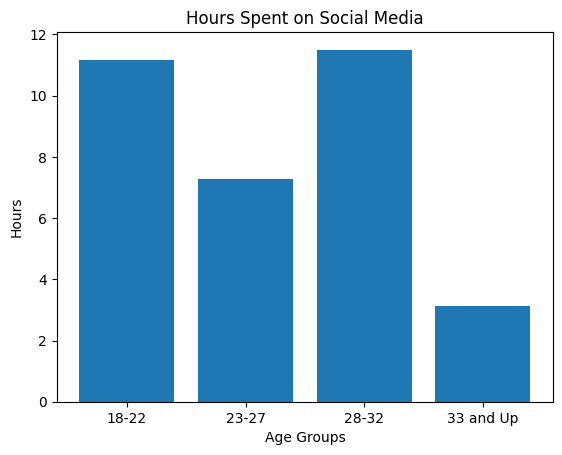

In [ ]:
#bar graphs
ages = ['18-22', '23-27', '28-32', '33 and Up']
hrMeans = [age1average, age2average, age3average, age4average]

x = np.arange(len(ages))
width = 0.25
multiplier = 0

plt.bar(ages, hrMeans)

plt.xlabel('Age Groups')
plt.ylabel('Hours')
plt.title('Hours Spent on Social Media')

plt.show()

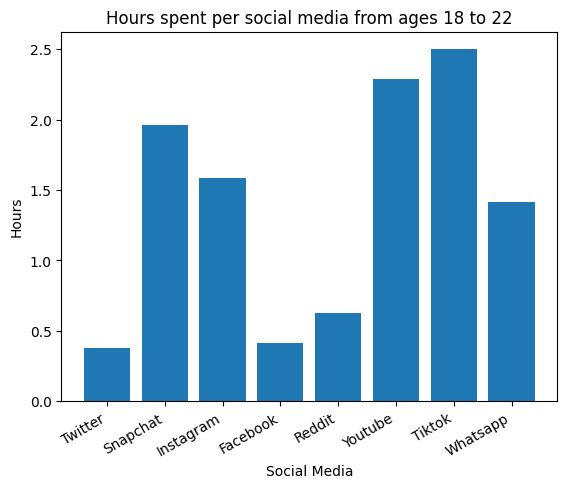

In [ ]:
def mediaHrs(min, max):
  labels = ['Twitter', 'Snapchat', 'Instagram', 'Facebook', 'Reddit', 'Youtube', 'Tiktok', 'Whatsapp']
  twit = social['Twitter']
  snap = social['Snapchat']
  insta = social['Instagram']
  face = social['Facebook']
  red = social['Reddit']
  you = social['Youtube']
  tik = social['Tiktok']
  what = social['Whatsapp']

  twitHrs = []
  snapHrs = []
  instaHrs = []
  faceHrs = []
  redHrs = []
  youHrs = []
  tikHrs = []
  whatHrs = []

  for i in range(len(social)):
    if age[i] >= min and age[i] <= max:
      twitHrs.append(twit[i])
      snapHrs.append(snap[i])
      instaHrs.append(insta[i])
      faceHrs.append(face[i])
      redHrs.append(red[i])
      youHrs.append(you[i])
      tikHrs.append(tik[i])
      whatHrs.append(what[i])

  medias = [np.mean(twitHrs), np.mean(snapHrs), np.mean(instaHrs), np.mean(faceHrs), np.mean(redHrs), np.mean(youHrs), np.mean(tikHrs), np.mean(whatHrs)]
  plt.bar(labels, medias)
  plt.xlabel('Social Media')
  plt.ylabel('Hours')
  plt.title('Hours spent per social media from ages ' + str(min) + ' to ' + str(max))

  plt.xticks(rotation=30, ha='right')

  plt.show()

mediaHrs(18, 22)

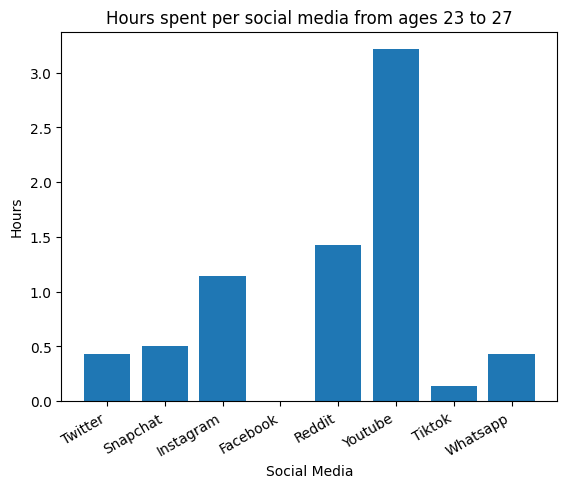

In [ ]:
mediaHrs(23, 27)

In [ ]:
mediaHrs(28, 32)

NameError: ignored

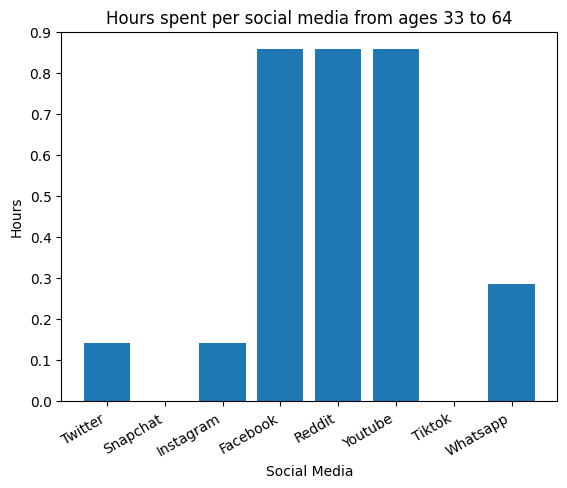

In [ ]:
mediaHrs(33, 64)

Question: does the age of the user have any significance on the amount of hours the user spend on social media?

We can deterime this through a linear regression model. The code below will demonstrate this

In [ ]:
# libraries needed
import sklearn as sk
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import statsmodels.api as sm


In [ ]:
# Drop unnessecary data

social = social.drop(['Do you consider yourself a social media user?','Device', 'Twitter','Snapchat', 'Instagram'
, 'Facebook', 'Reddit', 'Youtube', 'Tiktok', 'Whatsapp'], axis=1)

social.to_csv('Linear_final')



const             14.913208
Your_Age_Group    -0.232456
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                  Total   R-squared:                       0.122
Model:                            OLS   Adj. R-squared:                  0.103
Method:                 Least Squares   F-statistic:                     6.267
Date:                Sun, 23 Apr 2023   Prob (F-statistic):             0.0160
Time:                        01:10:05   Log-Likelihood:                -156.12
No. Observations:                  47   AIC:                             316.2
Df Residuals:                      45   BIC:                             319.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------

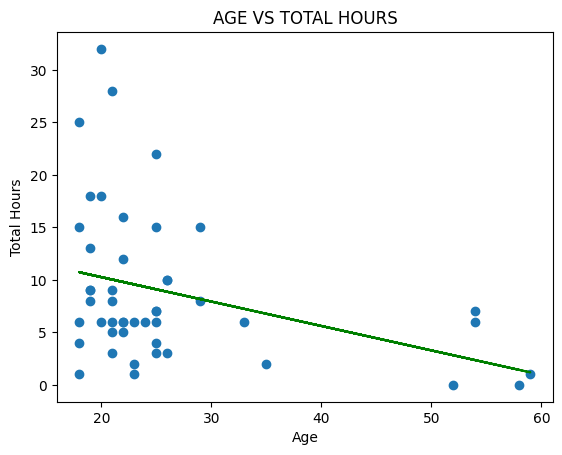

In [ ]:
data = pd.read_csv("Linear_final")
X = data['Your_Age_Group']
Y = data['Total']

X_train_sm = sm.add_constant(X)

lr = sm.OLS(Y, X_train_sm).fit()
print(lr.params)
print(lr.summary())

plt.scatter(X, Y)
plt.plot(X, 14.9132 - 0.2325*X, 'g')
plt.xlabel('Age')
plt.ylabel('Total Hours')
plt.title('AGE VS TOTAL HOURS')
plt.show()

From the linear regression model we get an idea of the amount of hours of social meadia being used determines the age groups. Here we can see that there is a negative correlation between the age and the hours. As the hours increase the groups decrease in age. This concludes that younger groups use social media more often than people in the older groups.

<Figure size 640x480 with 0 Axes>

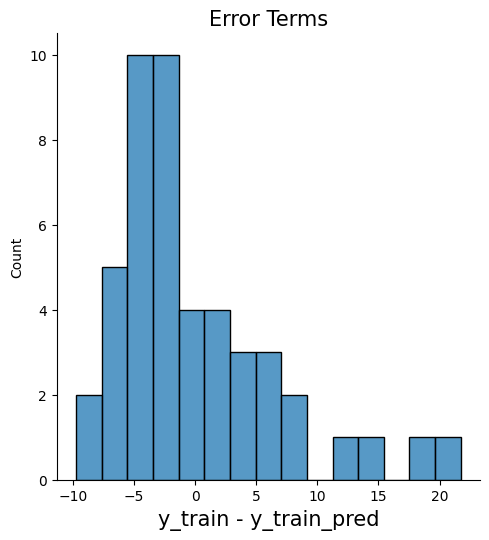

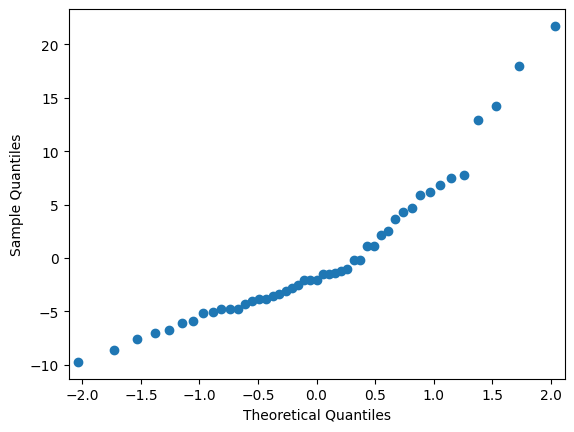

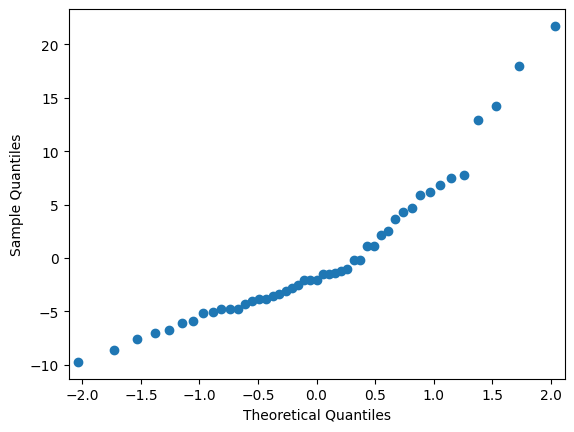

In [ ]:
y_train_pred = lr.predict(X_train_sm)

res = (Y - y_train_pred)

fig = plt.figure()
sns.displot(res, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()


sm.qqplot(res)



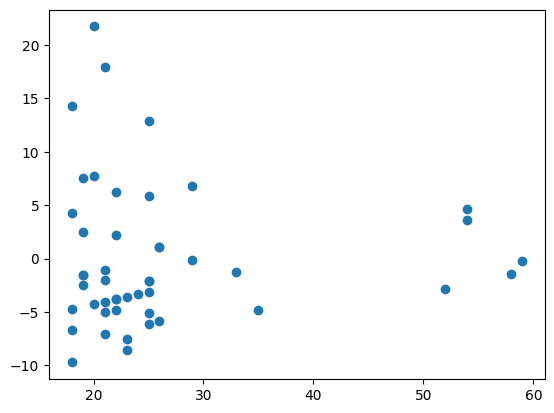

In [ ]:

plt.scatter(X,res)
plt.show()

It is important to test the signifience of this linear regression model. We can do this by applying ANOVA testing and check if it fits with our hypothesis.

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.stats.anova import AnovaRM

social = pd.read_csv('Social_Media_Usage_Study_1.csv')


my_model = smf.ols(formula='Your_Age_Group ~ Total  ', data=social)
my_model_fit = my_model.fit()

# print summary of linear regression


# show anova table
anova_table = sm.stats.anova_lm(my_model_fit, typ=1)
print(anova_table)

            df       sum_sq     mean_sq         F    PR(>F)
Total      1.0   665.592458  665.592458  6.267289  0.015995
Residual  45.0  4779.045840  106.201019       NaN       NaN


Above we can see that we have a p value of 0.015995. This indicates that the relationship between the age groups and total hours has enough of a significence to be considered a correltion in the larger population.

________________________________________________________________________________

We gathered this data from a google survey that our group created. This means we only have a sample data set and not the entire population. We can deterime the acutal population mean of which age is actually using social media with a 95% confidnece interval. Becuase we do not have the population standard devation, We will need to use t distribution to account for the increased error of a single sample set. However, becuase our sample size is small, we will have a larger confidence interval range as the true stanard devation is also more prone to inaccuracy.

In [ ]:
# confidence interval
import scipy.stats
sample_size = 47
social_data = pd.read_csv('Social_Media_Usage_Study_1.csv')

social_age = social_data['Your_Age_Group']

sample_mean = social_age.mean()

t_critical = scipy.stats.t.ppf(q = 0.975, df=46)

print(f"t-critical value = {t_critical}")

sample_std = social_age.std(ddof=1)

sigma = sample_std/math.sqrt(sample_size)
margin_of_error = t_critical * sigma

confidence_interval = (sample_mean - margin_of_error,
                       sample_mean + margin_of_error)

print(f"the confidence interval = {confidence_interval}")

t-critical value = 2.0128955952945886
the confidence interval = (22.975896436916116, 29.36452909499878)


Here we can see that the population mean ranges from 22 to 29 years of age with a 95% confidence in which users use social media the most.

From the sample data we collected from the survey, our group was intresested in finding out which is the most used social media platform used by all age groups. To find this out, the means for all platforms are calculated then compare the mean hours for the largest one.

In [ ]:
twitter = social_data['Twitter']
snapchat = social_data['Snapchat']
instagram = social_data['Instagram']
facebook = social_data['Facebook']
reddit = social_data['Reddit']
youtube = social_data['Youtube']
tiktok = social_data['Tiktok']
whatsapp = social_data['Whatsapp']

twitter_mean = twitter.mean()
snapchat_mean = snapchat.mean()
instagram_mean = instagram.mean()
facebook_mean = facebook.mean()
reddit_mean = reddit.mean()
youtube_mean = youtube.mean()
tiktok_mean = tiktok.mean()
whatsapp_mean = whatsapp.mean()

platform_means = [twitter_mean, snapchat_mean, instagram_mean, facebook_mean,
                  reddit_mean, youtube_mean, tiktok_mean, whatsapp_mean]

popular_platform = max(platform_means)

print(f"the most popular platform used is YouTube with {popular_platform} Hours")

the most popular platform used is YouTube with 2.404255319148936 Hours
